# Exploratory and Explanatory Data Analysis (and Cleaning)

In [1]:
# Importing packages
import polars as pl
import warnings
import os
from pathlib import Path
import matplotlib.pyplot as plt

from project_d100.data import load_data, summary, save_parquet, extract_day, denormalise, denormalise_temp, ren_year, move_col, check_sum, log_transform
from project_d100.visualisations import plot_corr, plot_cramerv, plot_count, plot_dist, plot_box, plot_pairs, plot_histogram, plot_kde, plot_violin, plot_scatter

In [2]:
# Configure the display of tables
pl.Config.set_tbl_width_chars(200)
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(10)

# Remove fitter warnings
warnings.filterwarnings("ignore")

In [3]:
GRAPH_PATH = Path(os.getcwd()).parent / "visualisations" 

## EDA: Part 1

In [4]:
# Load data and basic visualisation
df_unclean = load_data()
df_unclean.head(n=5)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
i64,str,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,i64,i64,i64
1,"""2011-01-01""",1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,"""2011-01-01""",1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0.0,8,32,40
3,"""2011-01-01""",1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0.0,5,27,32
4,"""2011-01-01""",1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,"""2011-01-01""",1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Summary of the data
summary(df_unclean)


Data Shape (rows, columns)
(17379, 17)

Data Types
instant: Int64
dteday: String
season: Int64
yr: Int64
mnth: Int64
hr: Int64
holiday: Int64
weekday: Int64
workingday: Int64
weathersit: Int64
temp: Float64
atemp: Float64
hum: Float64
windspeed: Float64
casual: Int64
registered: Int64
cnt: Int64

Missing Values
shape: (1, 17)
┌─────────┬────────┬────────┬─────┬──────┬─────┬─────────┬─────────┬────────────┬────────────┬──────┬───────┬─────┬───────────┬────────┬────────────┬─────┐
│ instant ┆ dteday ┆ season ┆ yr  ┆ mnth ┆ hr  ┆ holiday ┆ weekday ┆ workingday ┆ weathersit ┆ temp ┆ atemp ┆ hum ┆ windspeed ┆ casual ┆ registered ┆ cnt │
│ ---     ┆ ---    ┆ ---    ┆ --- ┆ ---  ┆ --- ┆ ---     ┆ ---     ┆ ---        ┆ ---        ┆ ---  ┆ ---   ┆ --- ┆ ---       ┆ ---    ┆ ---        ┆ --- │
│ u32     ┆ u32    ┆ u32    ┆ u32 ┆ u32  ┆ u32 ┆ u32     ┆ u32     ┆ u32        ┆ u32        ┆ u32  ┆ u32   ┆ u32 ┆ u32       ┆ u32    ┆ u32        ┆ u32 │
╞═════════╪════════╪════════╪═════╪══════╪═════

## Cleaning:
- season, year, and mnth features were extracted from dteday -> extract day, then drop dteday
- renaming 0 and 1 in yr to 2011 and 2012 - decreases confusion in the future
- The following features need to be turned into categoricals: season, year, mnth, hr, holiday, weekday, workingday, weathersit (review again after visualisation)
- De-normalise data for following features: temp (41), atemp (50), hum (100), windspeed (67)
    - According to Readme.txt, they normalised data by dividing by max values (in the parentheses above)

### Other points:
- no missing values
- no duplicates

In [6]:
# Extracting the day from the date; moving the day column next to other time features
df_unclean = extract_day(df_unclean, "dteday")
df_unclean = move_col(df_unclean, "day", 4)

In [7]:
# Renaming the year values
df_unclean = ren_year(df_unclean, "yr")

In [8]:
summary(df_unclean)


Data Shape (rows, columns)
(17379, 17)

Data Types
instant: Int64
season: Int64
yr: Int32
mnth: Int64
day: Int8
hr: Int64
holiday: Int64
weekday: Int64
workingday: Int64
weathersit: Int64
temp: Float64
atemp: Float64
hum: Float64
windspeed: Float64
casual: Int64
registered: Int64
cnt: Int64

Missing Values
shape: (1, 17)
┌─────────┬────────┬─────┬──────┬─────┬─────┬─────────┬─────────┬────────────┬────────────┬──────┬───────┬─────┬───────────┬────────┬────────────┬─────┐
│ instant ┆ season ┆ yr  ┆ mnth ┆ day ┆ hr  ┆ holiday ┆ weekday ┆ workingday ┆ weathersit ┆ temp ┆ atemp ┆ hum ┆ windspeed ┆ casual ┆ registered ┆ cnt │
│ ---     ┆ ---    ┆ --- ┆ ---  ┆ --- ┆ --- ┆ ---     ┆ ---     ┆ ---        ┆ ---        ┆ ---  ┆ ---   ┆ --- ┆ ---       ┆ ---    ┆ ---        ┆ --- │
│ u32     ┆ u32    ┆ u32 ┆ u32  ┆ u32 ┆ u32 ┆ u32     ┆ u32     ┆ u32        ┆ u32        ┆ u32  ┆ u32   ┆ u32 ┆ u32       ┆ u32    ┆ u32        ┆ u32 │
╞═════════╪════════╪═════╪══════╪═════╪═════╪═════════╪═════════

In [9]:
# Denormalising data
normalised_cols = {"hum" : 100, "windspeed" : 67}
for col, value in normalised_cols.items():
    df_unclean = denormalise(df_unclean, col, value)

In [10]:
# Denormalising temperature based on tranformation from the data description
df_unclean = denormalise_temp(df_unclean, "temp", t_max = 39, t_min = -8)
df_unclean = denormalise_temp(df_unclean, "atemp", t_max = 50, t_min = -16)

In [11]:
# Reorganising columns for easier visualisation - target variable first
df_unclean = move_col(df_unclean, "cnt", 1)
df_unclean = move_col(df_unclean, "casual", 2)
df_unclean = move_col(df_unclean, "registered", 3)

## EDA: Part 2

In [12]:
summary(df_unclean)


Data Shape (rows, columns)
(17379, 17)

Data Types
instant: Int64
cnt: Int64
casual: Int64
registered: Int64
season: Int64
yr: Int32
mnth: Int64
day: Int8
hr: Int64
holiday: Int64
weekday: Int64
workingday: Int64
weathersit: Int64
temp: Float64
atemp: Float64
hum: Float64
windspeed: Float64

Missing Values
shape: (1, 17)
┌─────────┬─────┬────────┬────────────┬────────┬─────┬──────┬─────┬─────┬─────────┬─────────┬────────────┬────────────┬──────┬───────┬─────┬───────────┐
│ instant ┆ cnt ┆ casual ┆ registered ┆ season ┆ yr  ┆ mnth ┆ day ┆ hr  ┆ holiday ┆ weekday ┆ workingday ┆ weathersit ┆ temp ┆ atemp ┆ hum ┆ windspeed │
│ ---     ┆ --- ┆ ---    ┆ ---        ┆ ---    ┆ --- ┆ ---  ┆ --- ┆ --- ┆ ---     ┆ ---     ┆ ---        ┆ ---        ┆ ---  ┆ ---   ┆ --- ┆ ---       │
│ u32     ┆ u32 ┆ u32    ┆ u32        ┆ u32    ┆ u32 ┆ u32  ┆ u32 ┆ u32 ┆ u32     ┆ u32     ┆ u32        ┆ u32        ┆ u32  ┆ u32   ┆ u32 ┆ u32       │
╞═════════╪═════╪════════╪════════════╪════════╪═════╪══════╪═══

In [13]:
# Checking for inconsistencies in the target variable
check_sum(df_unclean, "cnt", "casual", "registered")

In [14]:
# Dropping the casual and registered columns
df_unclean = df_unclean.drop(["casual", "registered"])

In [15]:
save_parquet(df_unclean, "hours_partially_cleaned")

## EDA: Visualisations

### Target Variable

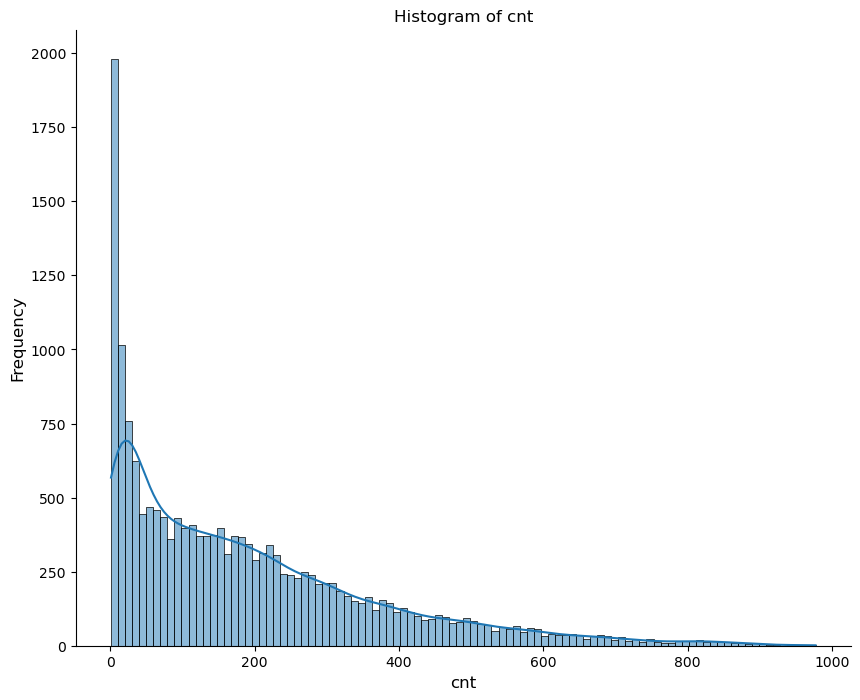

In [16]:
# Count plot to look at the distribution of the target variable
hist = plot_histogram(df_unclean, "cnt", bins = 100)
plt.show()

2024-12-19 01:39:53.708 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=5.5e-05)
2024-12-19 01:39:53.748 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=5.9e-05)
2024-12-19 01:39:53.870 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=1.8e-05)


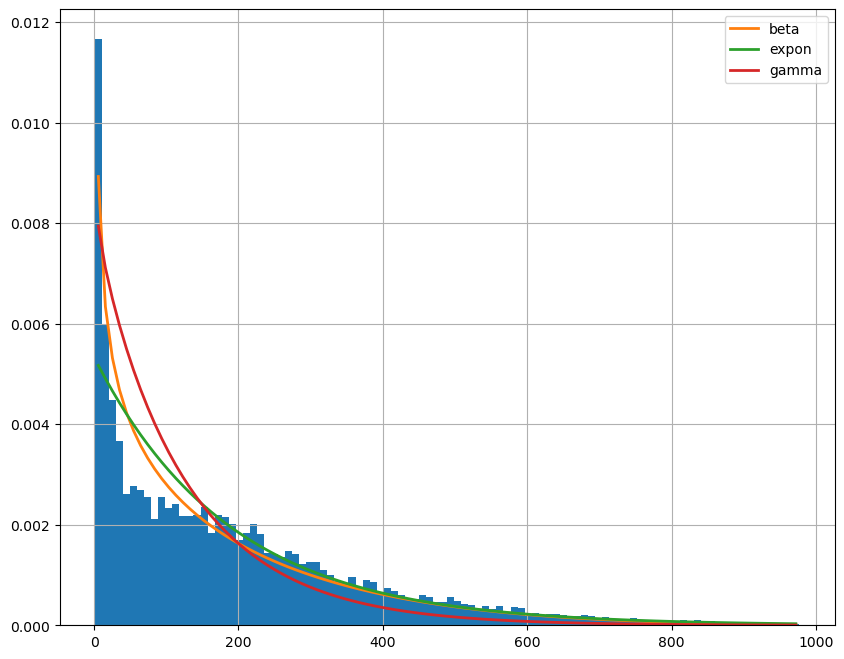

In [17]:
# Superimposed histogram and KDE plot for the target variable
plot_dist(df_unclean, "cnt", dist = ["gamma", "expon", "beta"])

### Log Transformation
- there are many large outliers of cnt
- log transforming might possibly solve this

In [18]:
# Log transforming the target variable
# min(cnt) = 1, so no error
df_unclean = log_transform(df_unclean, "cnt")

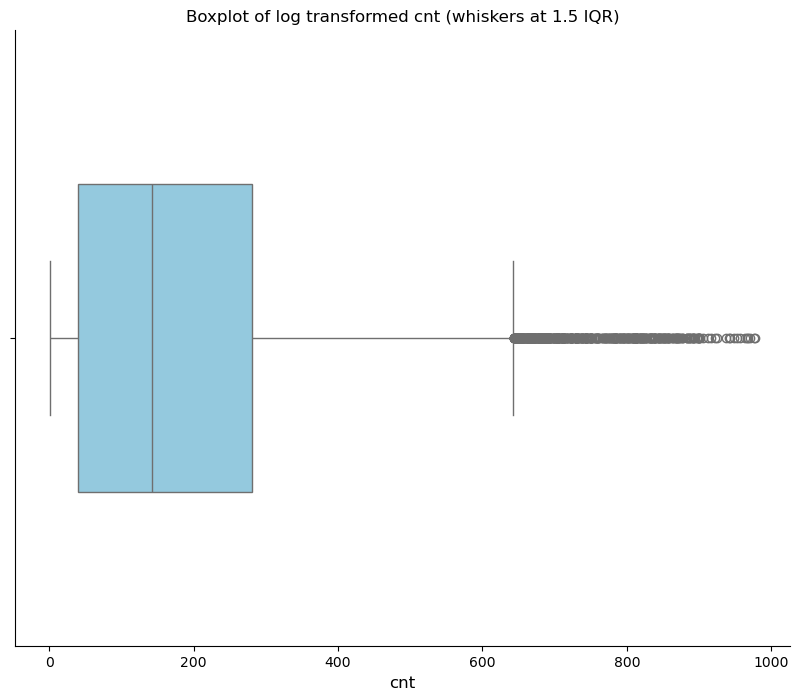

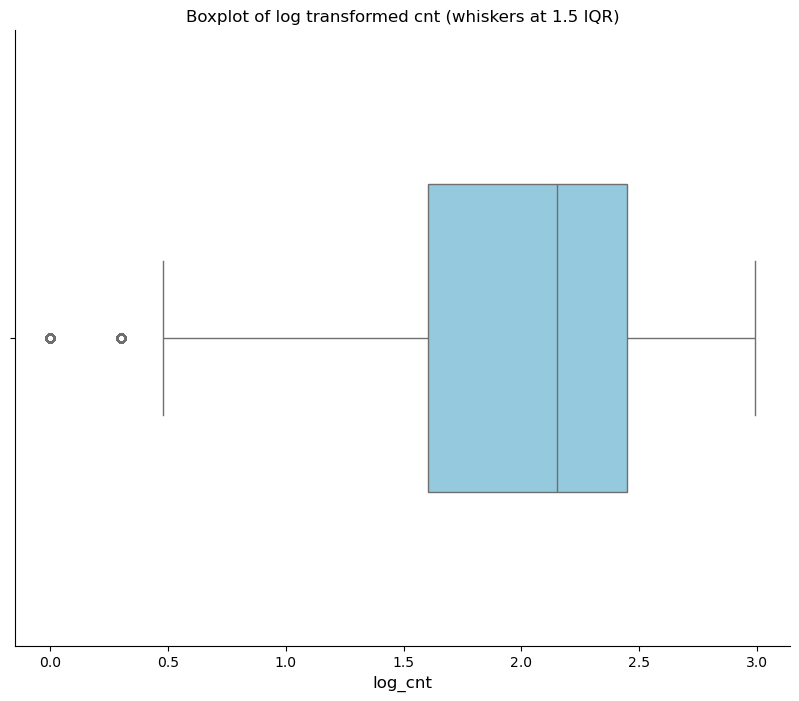

In [19]:
# Compare estimated densities before and after log transformation
box = plot_box(df_unclean, x_var="cnt", title = "Boxplot of log transformed cnt (whiskers at 1.5 IQR)")
plt.show()


plot_box(df_unclean, x_var="log_cnt", title = "Boxplot of log transformed cnt (whiskers at 1.5 IQR)")
plt.show()

In [20]:
summary(df_unclean)


Data Shape (rows, columns)
(17379, 16)

Data Types
instant: Int64
cnt: Int64
season: Int64
yr: Int32
mnth: Int64
day: Int8
hr: Int64
holiday: Int64
weekday: Int64
workingday: Int64
weathersit: Int64
temp: Float64
atemp: Float64
hum: Float64
windspeed: Float64
log_cnt: Float64

Missing Values
shape: (1, 16)
┌─────────┬─────┬────────┬─────┬──────┬─────┬─────┬─────────┬─────────┬────────────┬────────────┬──────┬───────┬─────┬───────────┬─────────┐
│ instant ┆ cnt ┆ season ┆ yr  ┆ mnth ┆ day ┆ hr  ┆ holiday ┆ weekday ┆ workingday ┆ weathersit ┆ temp ┆ atemp ┆ hum ┆ windspeed ┆ log_cnt │
│ ---     ┆ --- ┆ ---    ┆ --- ┆ ---  ┆ --- ┆ --- ┆ ---     ┆ ---     ┆ ---        ┆ ---        ┆ ---  ┆ ---   ┆ --- ┆ ---       ┆ ---     │
│ u32     ┆ u32 ┆ u32    ┆ u32 ┆ u32  ┆ u32 ┆ u32 ┆ u32     ┆ u32     ┆ u32        ┆ u32        ┆ u32  ┆ u32   ┆ u32 ┆ u32       ┆ u32     │
╞═════════╪═════╪════════╪═════╪══════╪═════╪═════╪═════════╪═════════╪════════════╪════════════╪══════╪═══════╪═════╪═════════

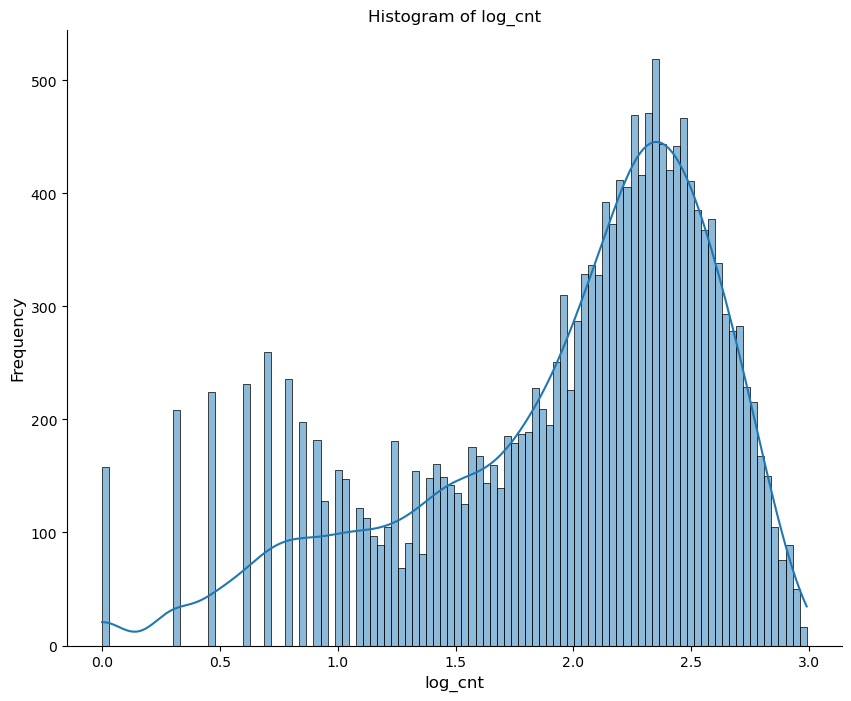

In [21]:
hist = plot_histogram(df_unclean, "log_cnt", bins = 100)
plt.show()

2024-12-19 01:39:54.961 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted loggamma distribution with error=1.358843)
2024-12-19 01:39:54.975 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted genlogistic distribution with error=1.367721)
2024-12-19 01:39:55.089 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted exponpow distribution with error=1.482903)


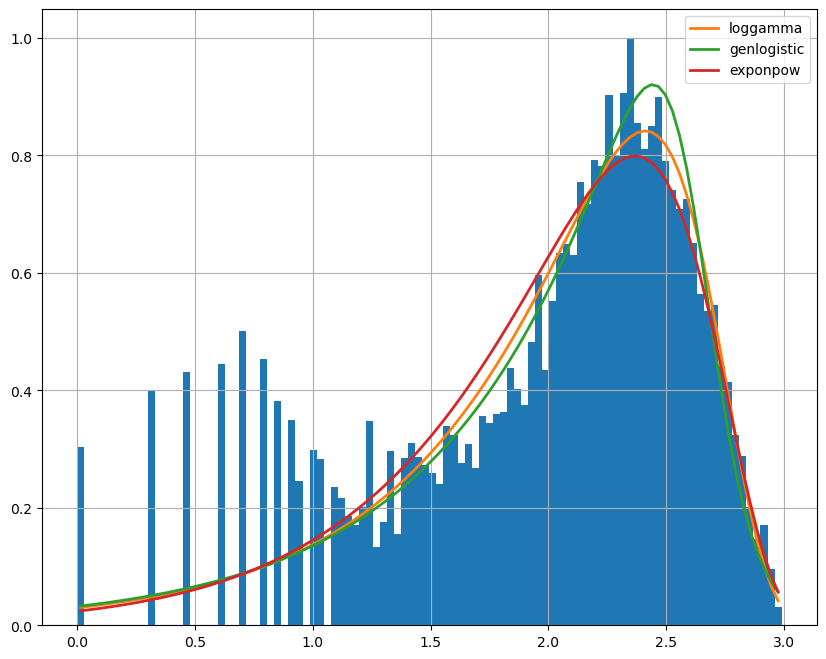

In [22]:
plot_dist(df_unclean, "log_cnt", dist = ["loggamma", "exponpow", "genlogistic"])

- Skew is much less. Non-transformed data was heavily right-skewed
- Variance is much less too and there are fewer outliers
- Distributions fit the data better before the transformation

Dropping log transformation:
- Using a GLM to model so its important to have a distribution that fits the data

In [23]:
df_unclean = df_unclean.drop(["log_cnt"])

### Numericals

- Using pairplots because they are all weather-related features
- Likely they are related

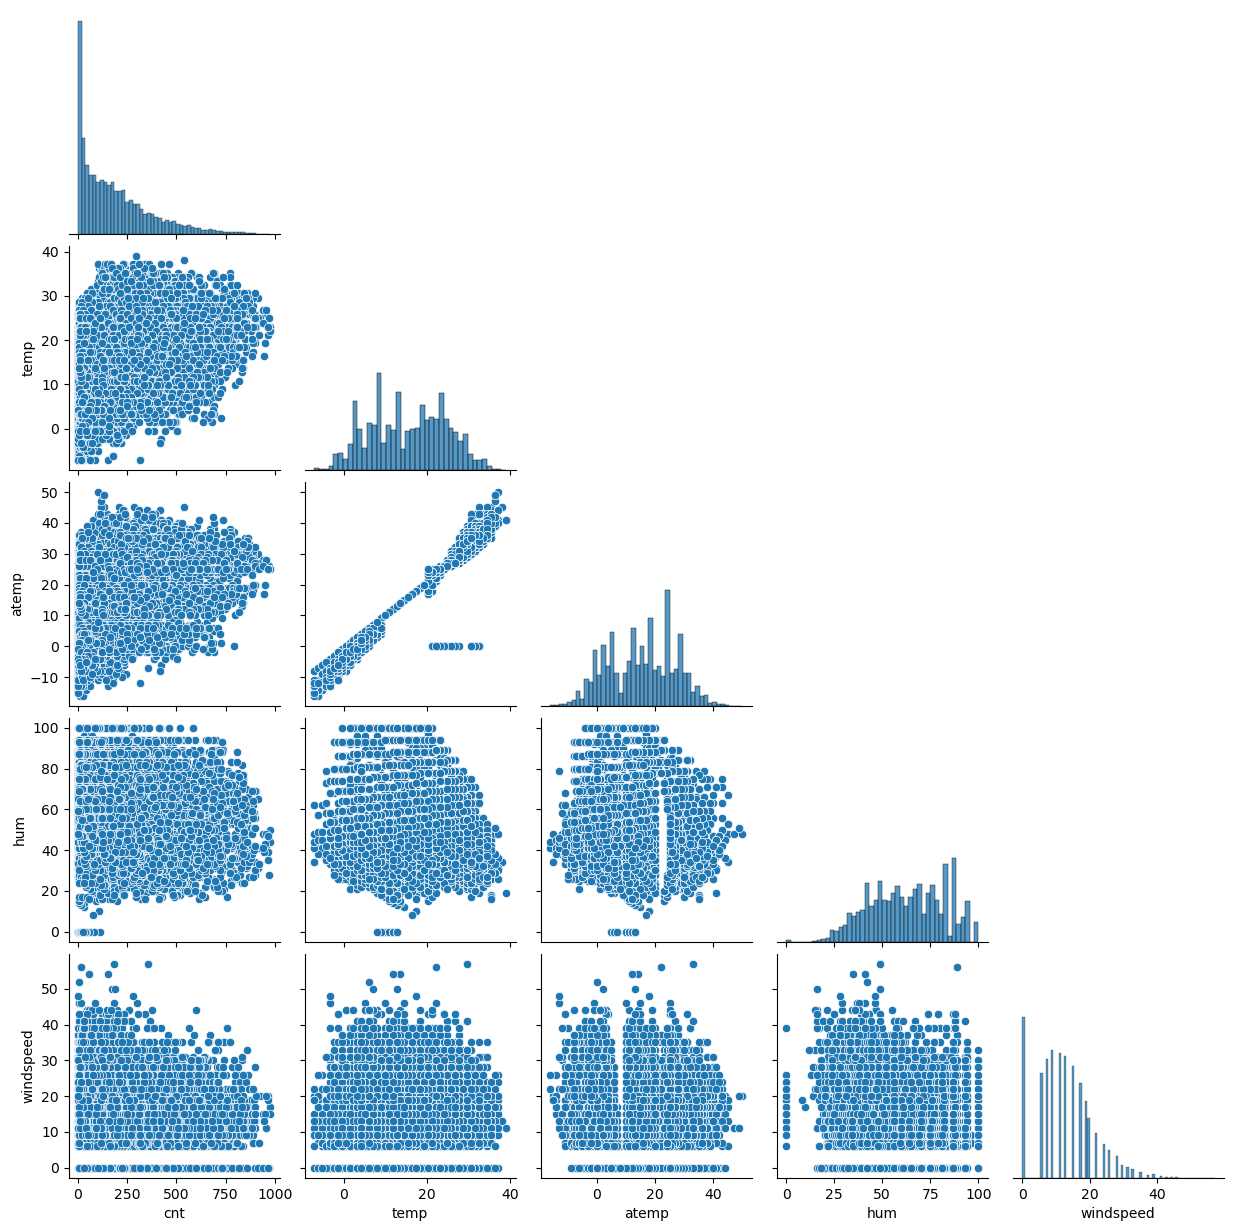

In [24]:
numericals = ["cnt", "temp", "atemp", "hum", "windspeed"]
plot_pairs(df_unclean, vars = numericals)
plt.show()

- Dataset does not specify the difference between temp and atemp, more specifically, how atemp is derived
- I will not drop it for the time being, but it is likely one of them will be dropped by the model

### Humidity

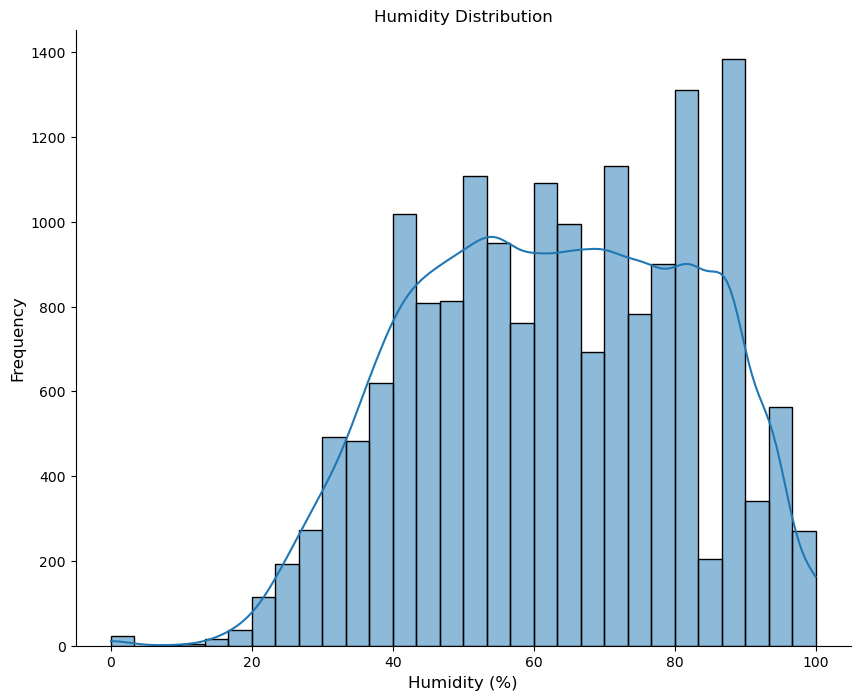

In [25]:
# Looking deeper into humidity
fig = plot_histogram(df_unclean, "hum", bins = 30, title = "Humidity Distribution", xlabel = "Humidity (%)")
plt.show()

Dropping hum because:
- 0% humidity is impossible in Washington, so is anything below at least 50%
- 100% humidity also occurs (which is impossible, at least at this frequency)
- There are many observations of this sort
- No proper function of normalisation so there is either:
    - A problem with the data collection
    - An unknown normalisation function

Either way, dropping the data is the best course of action

In [26]:
df_unclean = df_unclean.drop("hum")

### Correlation

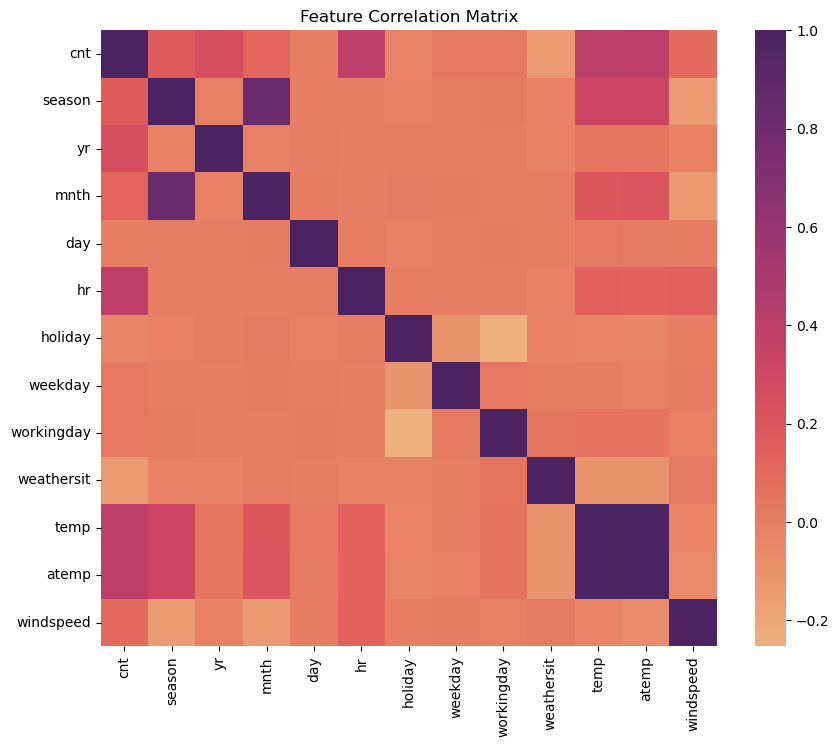

In [27]:
plot_corr(df_unclean, "instant")
plt.show()

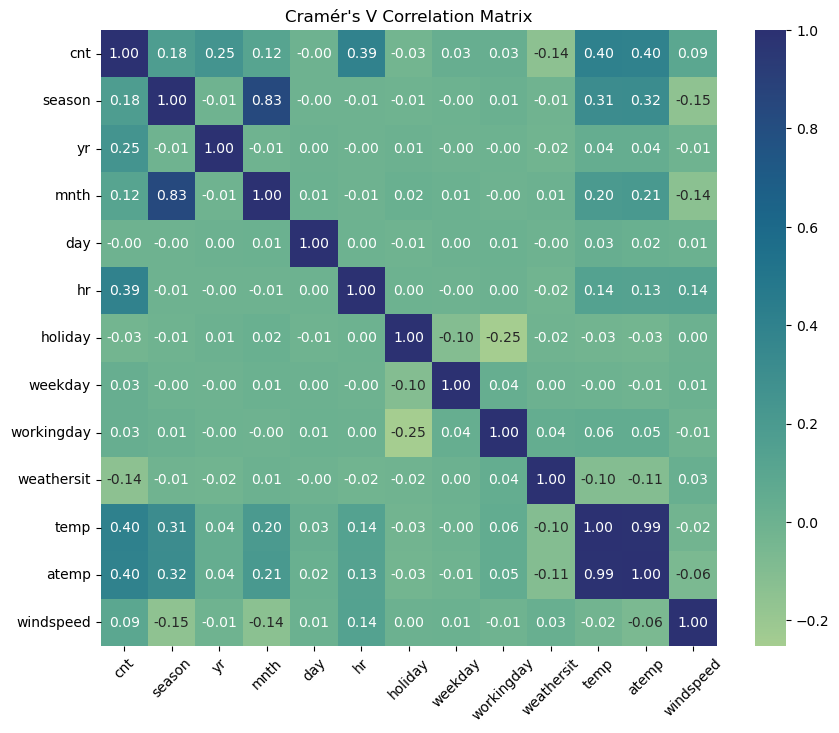

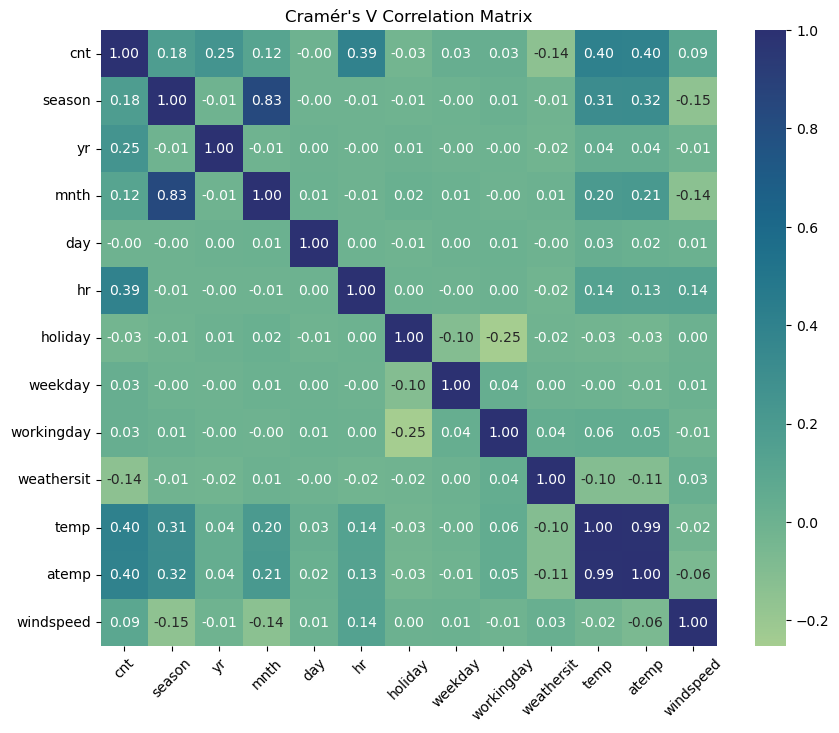

In [28]:
# More accurate correlation plot
# It calculates the Cramér's V statistic if the variable is categorical 
# and correlation coefficient if the variable is numerical
plot_cramerv(df_unclean, index_var = "instant")

Calculated Cramer's V for all the categoricals, similar values to those in correlation matrix

### Analysing features weakly correlated with cnt:
- day
- weekday
- holiday
- workingday
- weathersit

### Day

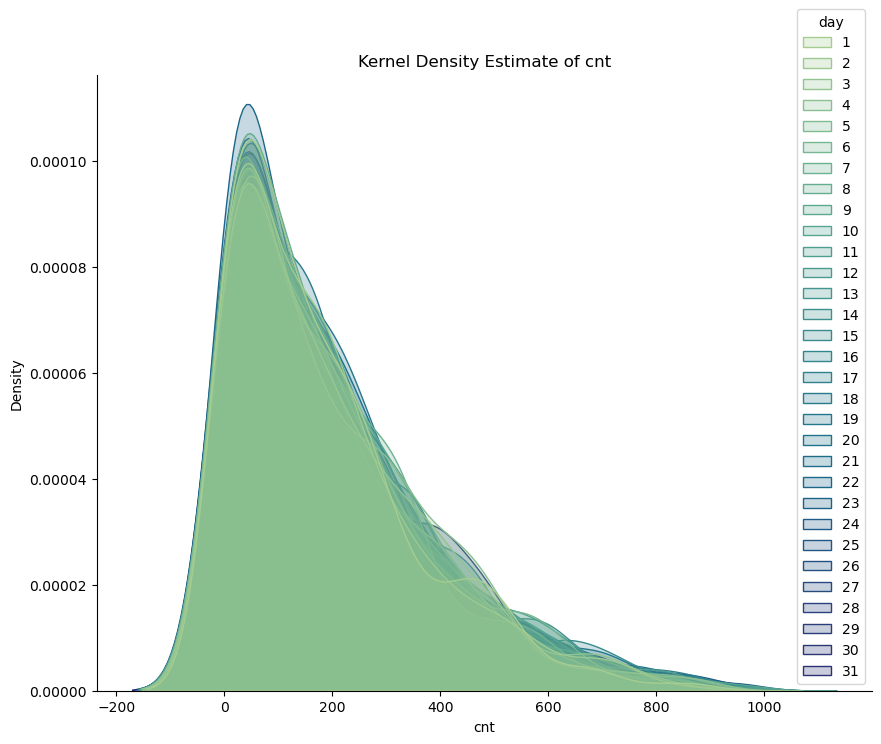

In [29]:
plot_kde(df_unclean, "cnt", hue="day")
plt.show()

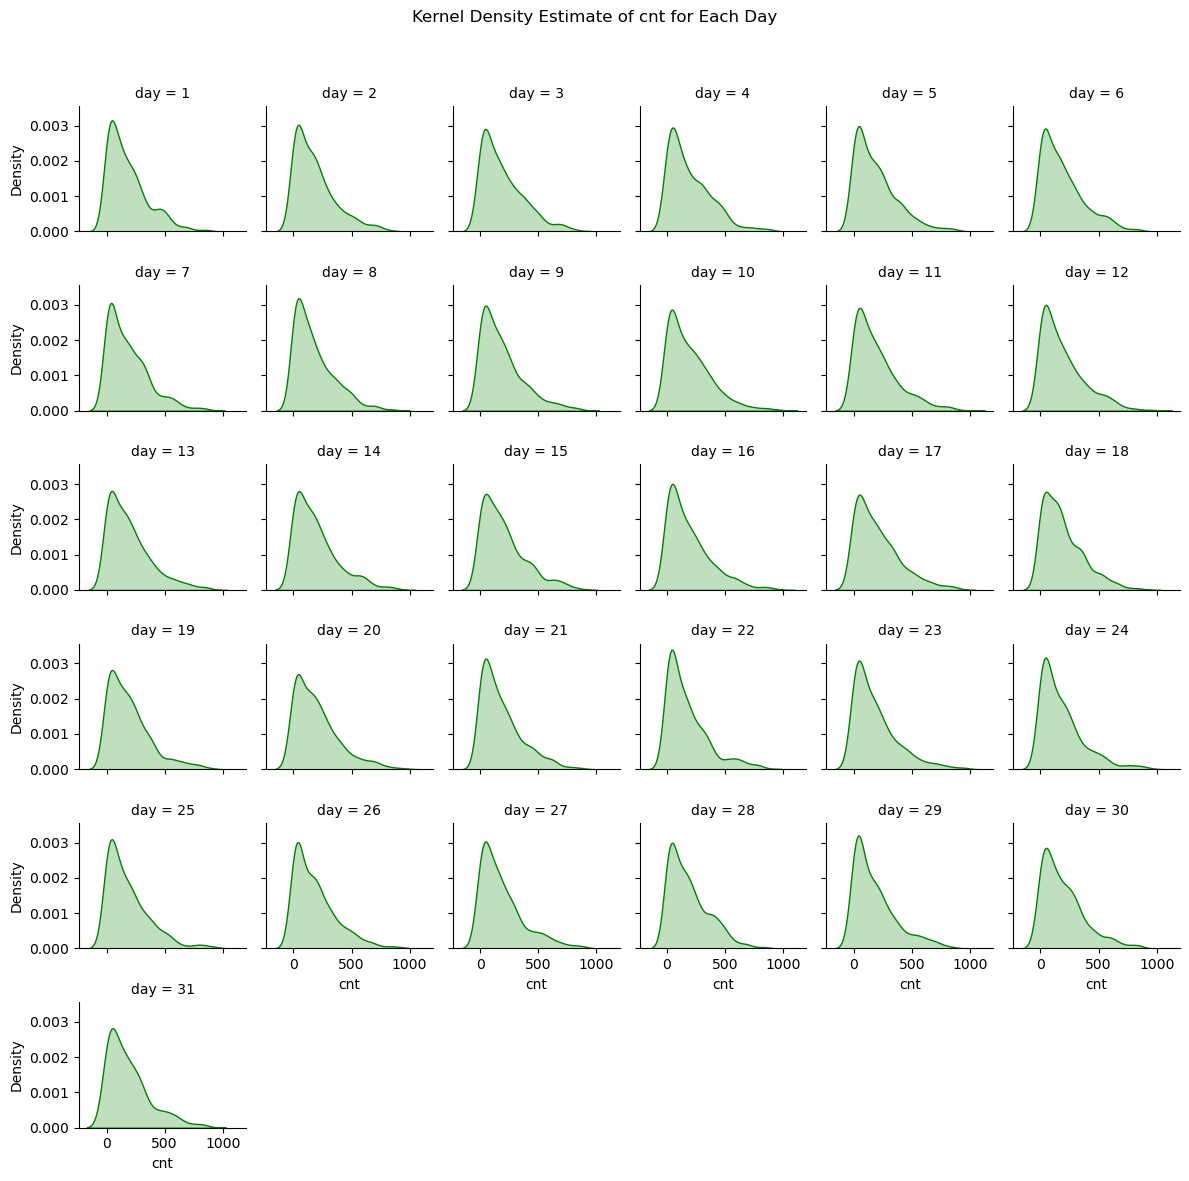

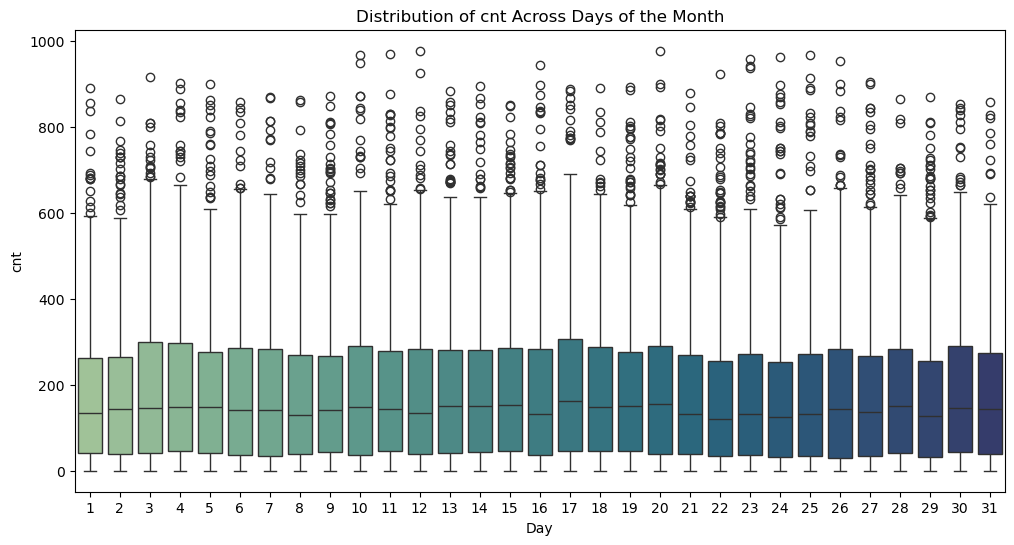

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df_unclean, col="day", col_wrap=6, height=2, sharex=True, sharey=True)
g.map(sns.kdeplot, "cnt", fill=True, color="green")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Kernel Density Estimate of cnt for Each Day")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="day", y="cnt", data=df_unclean, palette="crest")
plt.title("Distribution of cnt Across Days of the Month")
plt.xlabel("Day")
plt.ylabel("cnt")
plt.show()



Dropping day because:
- the KDE of cnt remains approximately the same despite the day - there is little within day variation that can be seen
- this is unlikely to be because of too few observations - there are observations of every hour in every day for 2 years

### Weekday

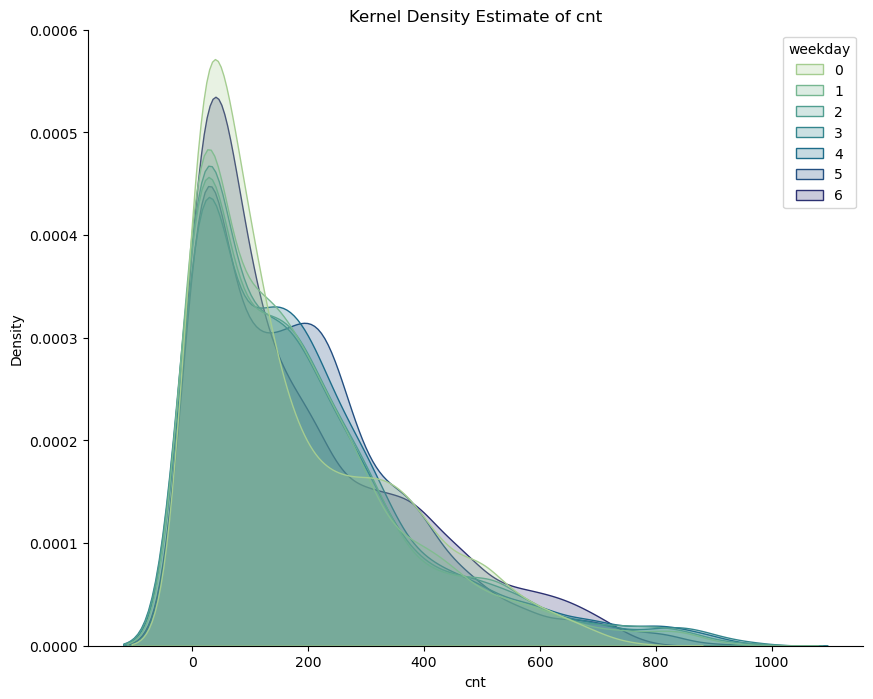

In [31]:
plot_kde(df_unclean, "cnt", hue="weekday")
plt.show()

I will create a weekend categorical because:
- there is a distinct difference between KDE of cnt for Saturday and Sunday compared to the rest of the days
- the difference between Saturday and Sunday does not look as distinct
- my feature selection in can drop this if needed

### Weekend

In [32]:
# Creating a weekend column
df_unclean = df_unclean.with_columns(
        pl.when((pl.col("weekday") == 0) | (pl.col("weekday") == 6))
        .then(1)
        .otherwise(0)
        .alias("weekend")
)

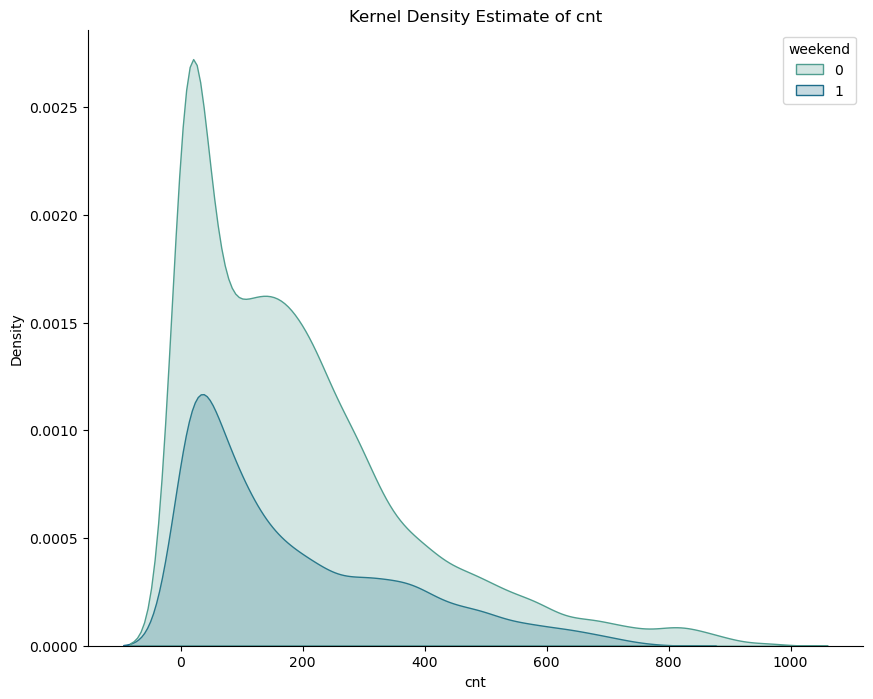

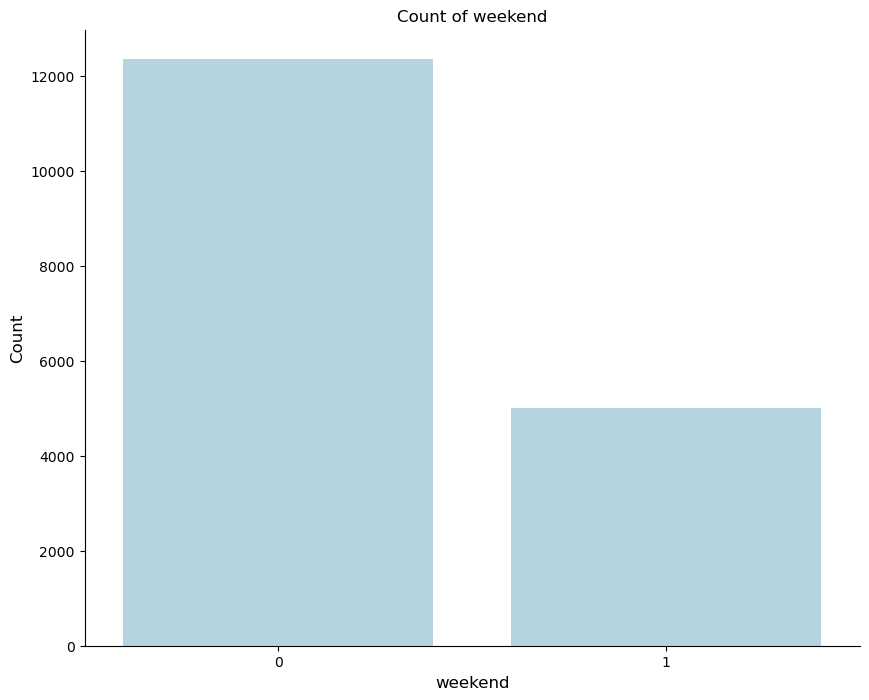

In [33]:
plot_kde(df_unclean, "cnt", hue="weekend")
plt.show()
plot_count(df_unclean, "weekend")
plt.show()

Dropping weekend because:
- KDE estimate of cnt is very similar to that of workingday (see below)
    - makes sense because they are formed similarly, and since there are few observations of holiday, this is expected
- Likely that the effects of weekend on cnt can be captured through workingday and weekday

In [34]:
df_unclean = df_unclean.drop("weekend")

### Holiday

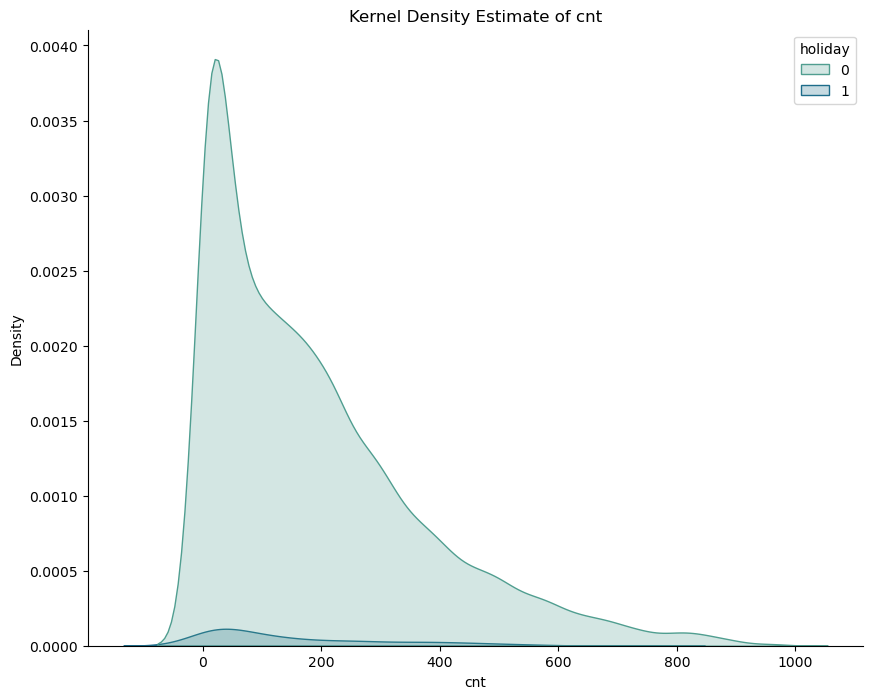

In [35]:
plot_kde(df_unclean, "cnt", hue="holiday")
plt.show()

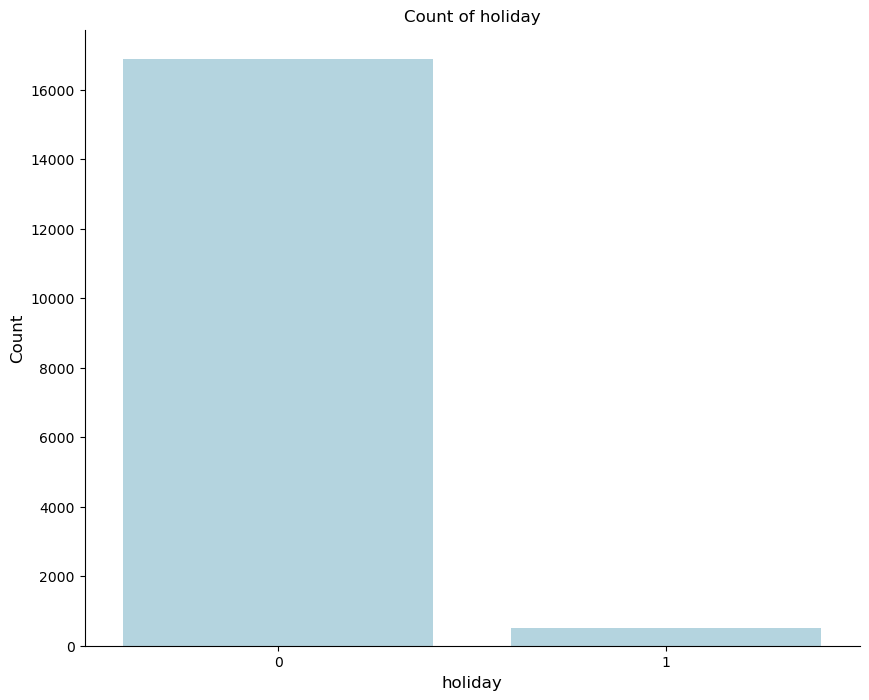

In [36]:
plot_count(df_unclean, "holiday")
plt.show()

Dropping holiday because:
- there are too few observations where holiday == 1, for there to be a significant effect of its variation on cnt
- likely feature selection will drop this anyway
- can get similar information from working day

### Working Day

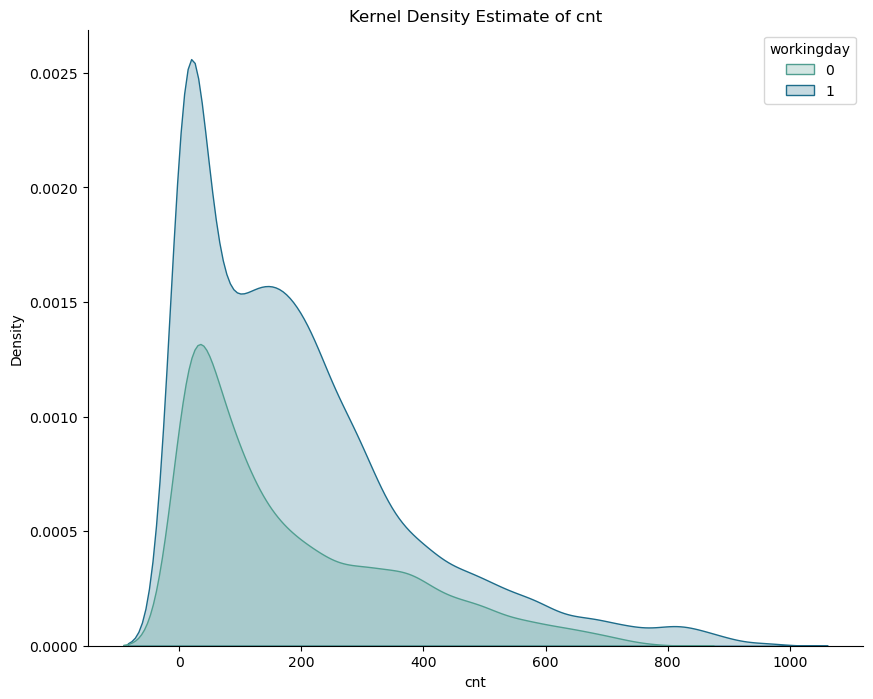

In [37]:
plot_kde(df_unclean, "cnt", hue="workingday")
plt.show()

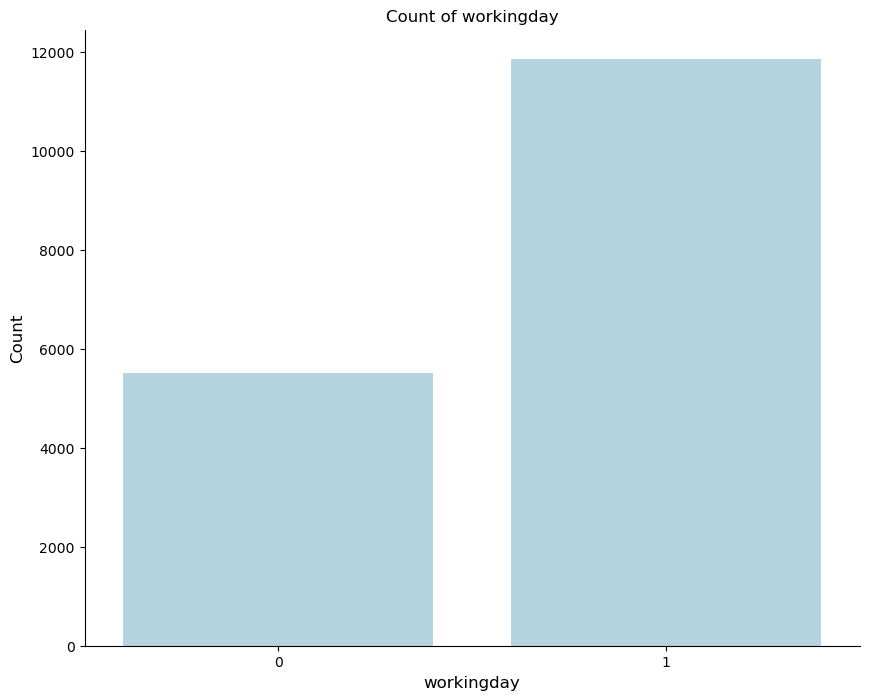

In [38]:
plot_count(df_unclean, "workingday")
plt.show()

Keeping workday because:
- hard to visually see if KDE of cnt changes with a change in workday
- have a significant number of observations for workday to be able to have an effect on cnt

### Weathersit

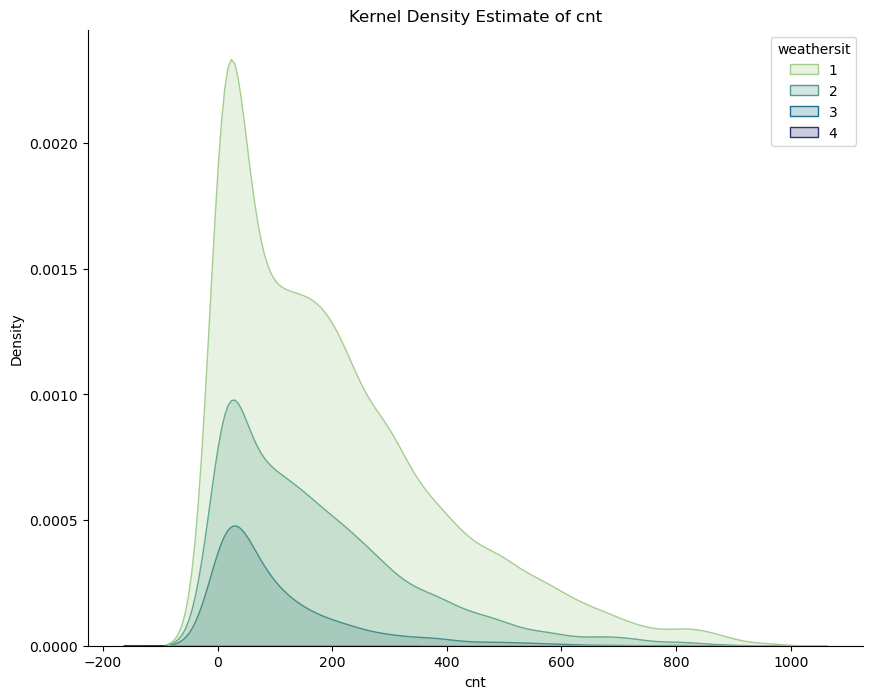

In [39]:
plot_kde(df_unclean, "cnt", hue="weathersit")
plt.show()

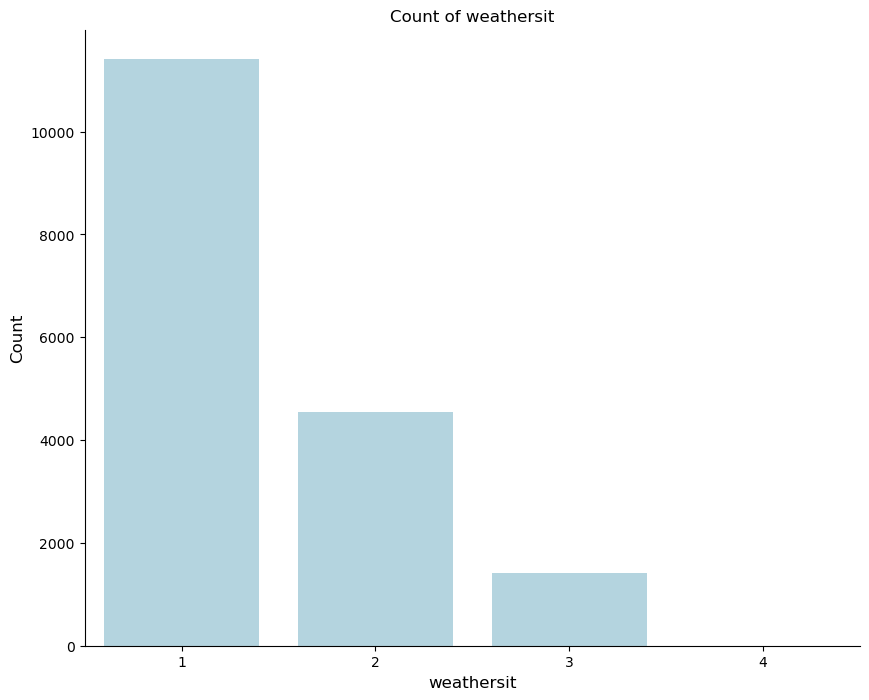

In [40]:
plot_count(df_unclean, "weathersit")
plt.show()

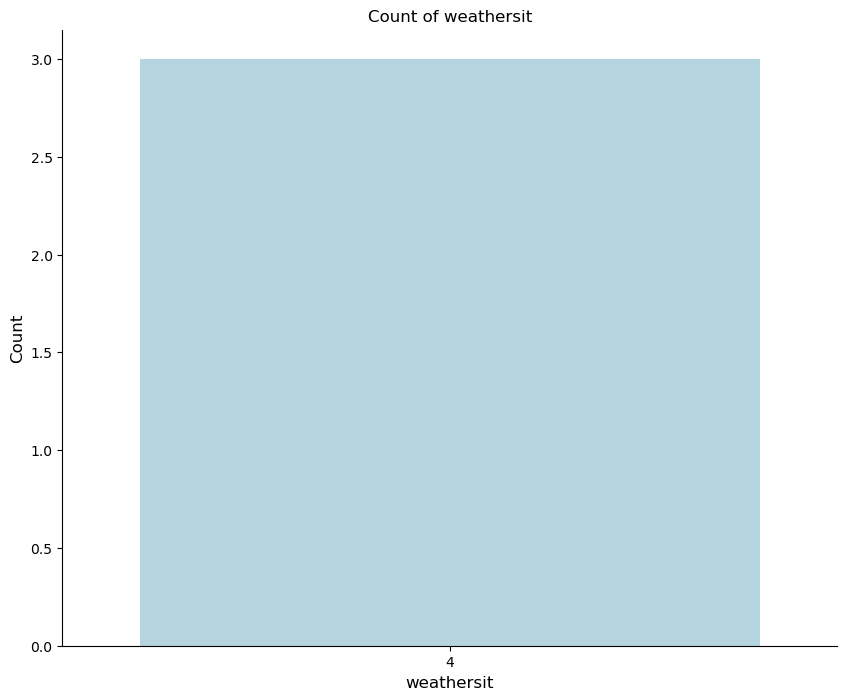

In [41]:
filtered_df = df_unclean.filter(df_unclean["weathersit"] == 4)
if not filtered_df.is_empty():
    plot_count(filtered_df, "weathersit")
    plt.show()

Not dropping weathersit beacuse:
- Eventhough 
    - KDE of cnt seems to follow a similar pattern for weathersit == 1 ,2 ,3
    - No observations of weathersit == 4
        - This is also true for the completely raw data (i.e these instances were not accidentally dropped in cleaning)
- Since the instances for each value of weathersit is not the same, its hard to see if it has an effect on cnt
- Worst case: I will come back and drop this

In [42]:
# Dropping day and holiday
df_unclean = df_unclean.drop("day")
df_unclean = df_unclean.drop("holiday")

## Explanatory Data Analysis: Visualisations

### Time

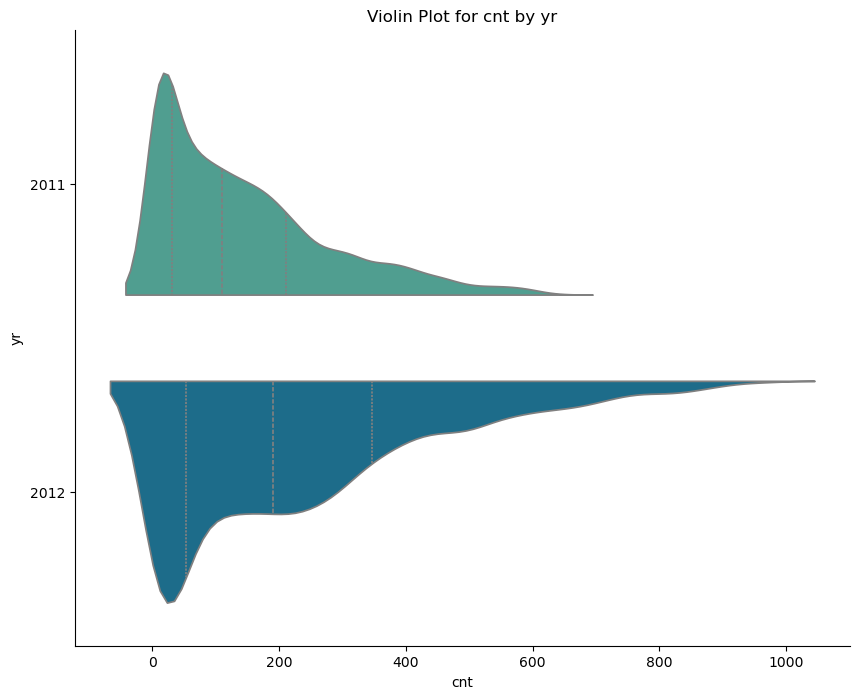

In [43]:
plot_violin(df_unclean, x_var = "cnt", y_var = "yr", split=True, gap = 0.1)
plt.show()

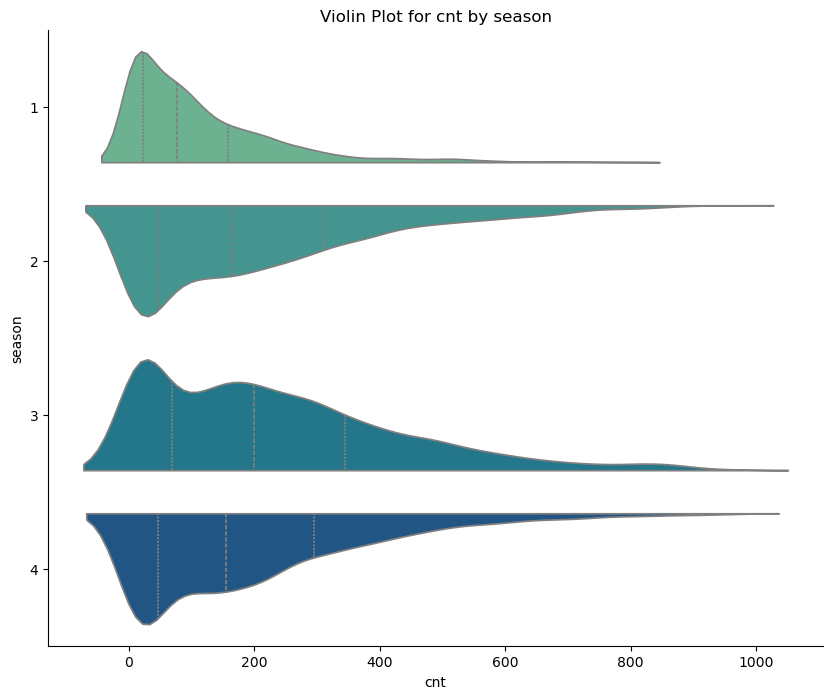

In [44]:
plot_violin(df_unclean, x_var = "cnt", y_var = "season", split=True, gap = 0.1)
plt.show()

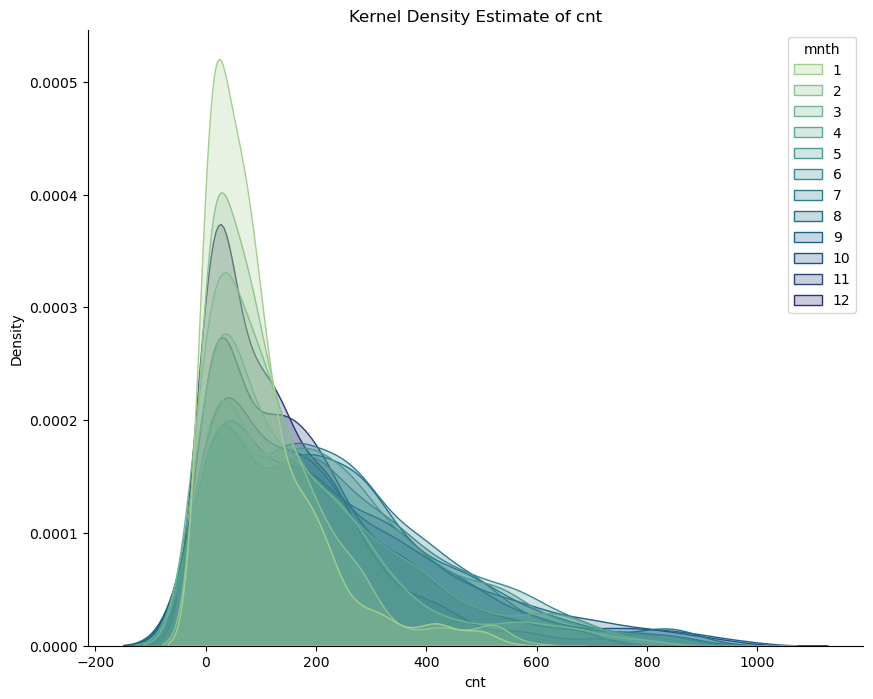

In [45]:
plot_kde(df_unclean, "cnt", hue="mnth")
plt.show()

- Makse sense because of the variation from seasons
- Used superimposed KDE instead of violin so easier comparison

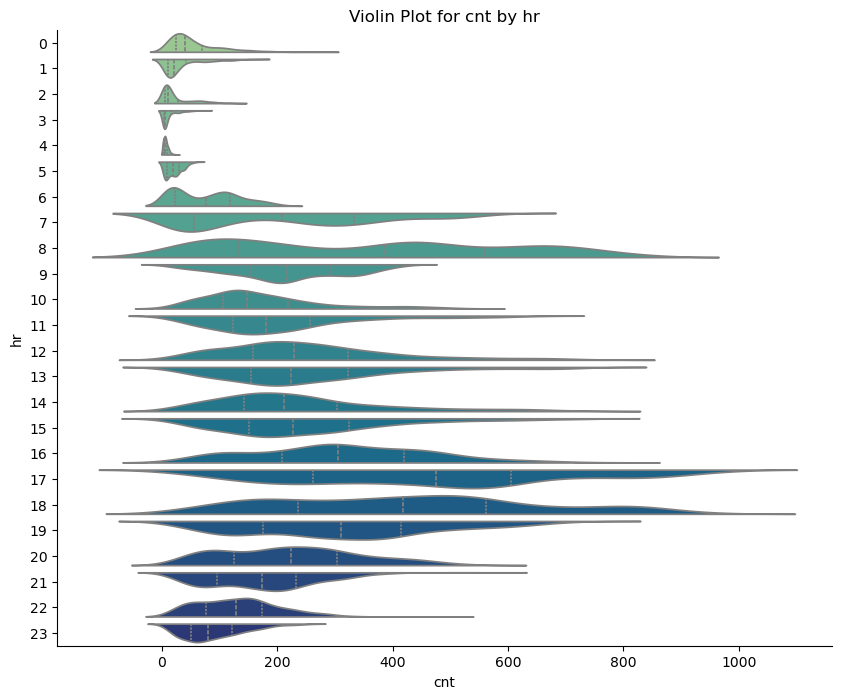

In [46]:
plot_violin(df_unclean, x_var = "cnt", y_var = "hr", split=True, gap = 0.1)
plt.show()

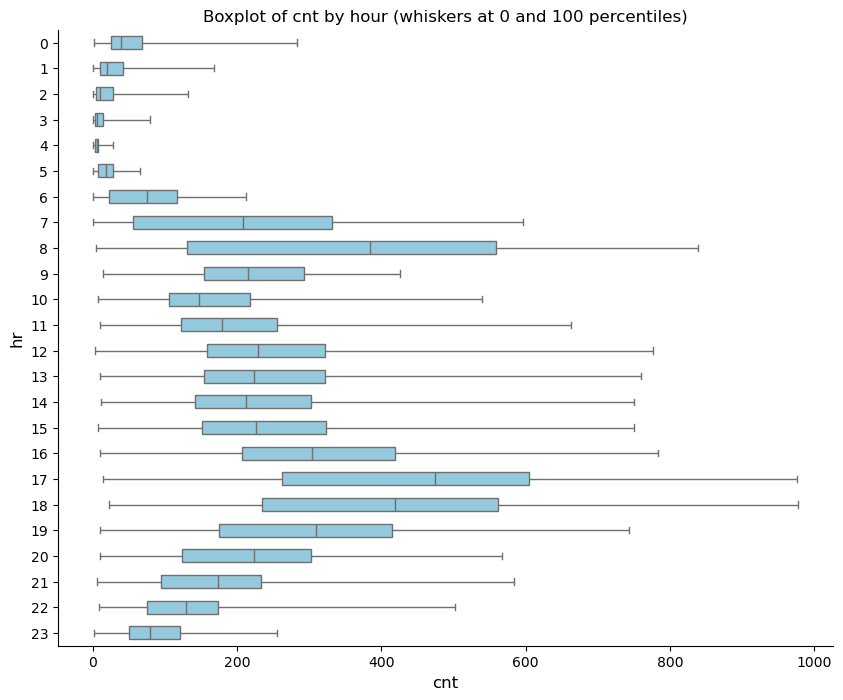

In [47]:
fig = plot_box(df_unclean, x_var = "cnt", y_var = "hr", whis = (0,100), title="Boxplot of cnt by hour (whiskers at 0 and 100 percentiles)")
plt.show()

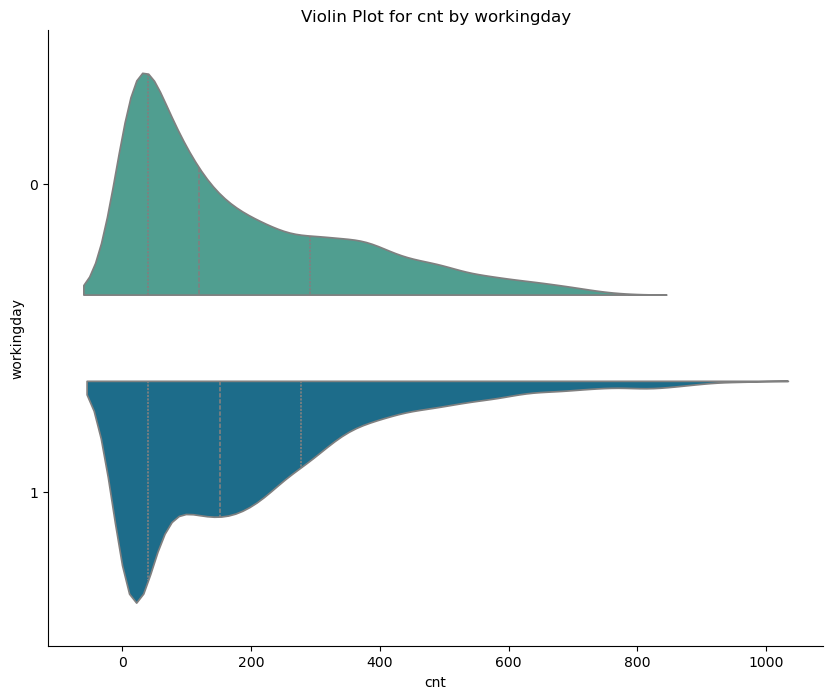

In [48]:
plot_violin(df_unclean, x_var = "cnt", y_var = "workingday", split=True, gap = 0.1)
plt.show()

### Weather

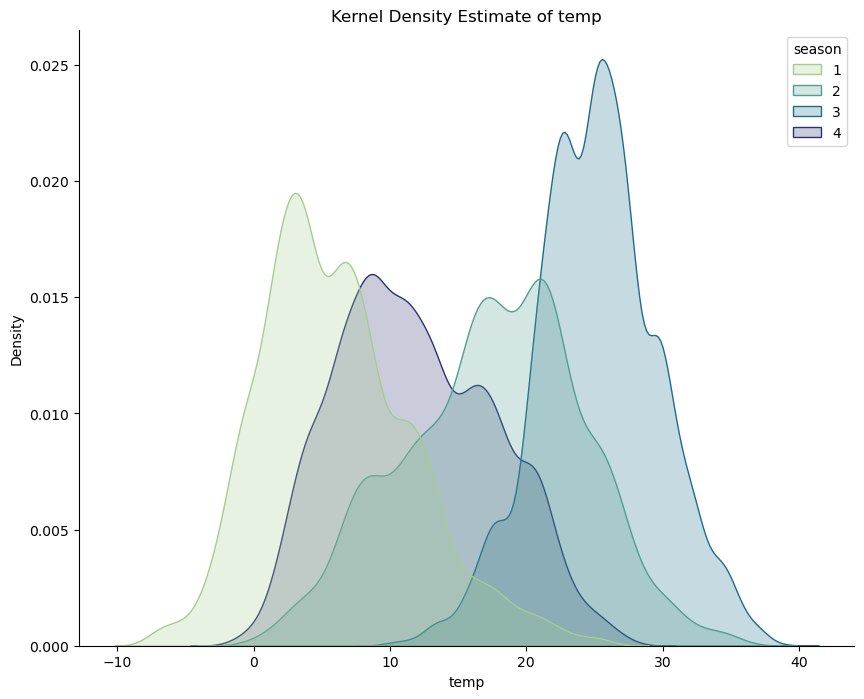

In [49]:
plot_kde(df_unclean, "temp", hue="season")
plt.show()

Unexpected: Summer tends to be warmer than autumn; winter tends to be colder than spring.
Data could be mislabelled
But it now makes sense that count tends to be lowest in spring and highest in autumn

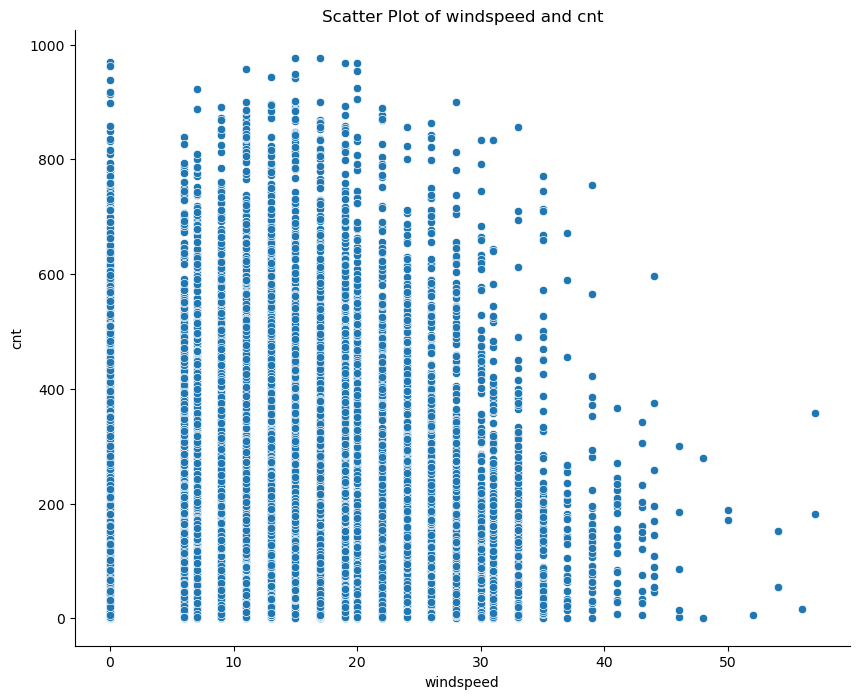

In [50]:
plot_scatter(df_unclean, y_var = "cnt", x_var = "windspeed")
plt.show()

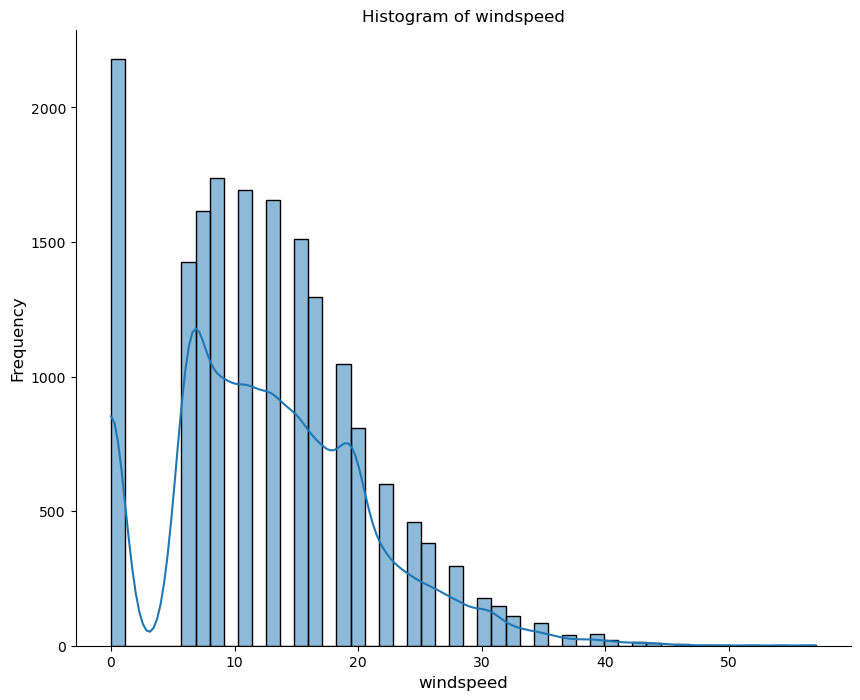

In [51]:
plot_histogram(df_unclean, "windspeed", bins=50)
plt.show()

- Few observations of windspeed above 10, even fewer above 25 (no units given, but I assume km/h because temperature was metric as well)
- Expected: count seems to be negatively correlated with windspeed
- Unexpected: windspeed is discrete and not continuous
    - Likely due to lack of data so it will be treated as a numerical as of now

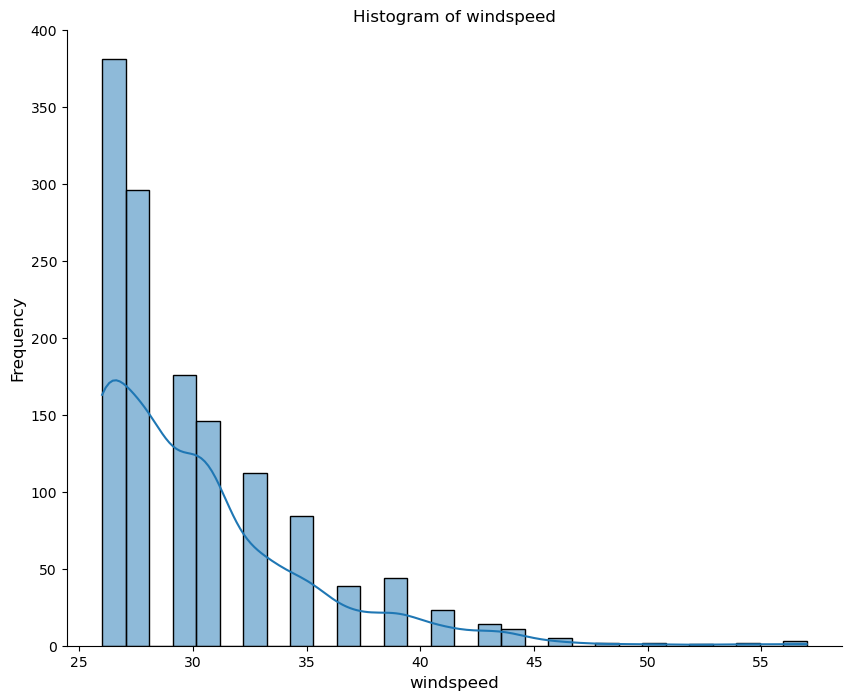

In [52]:
filtered_df = df_unclean.filter(df_unclean["windspeed"] > 25)
if not filtered_df.is_empty():
    plot_histogram(filtered_df, "windspeed")
    plt.show()

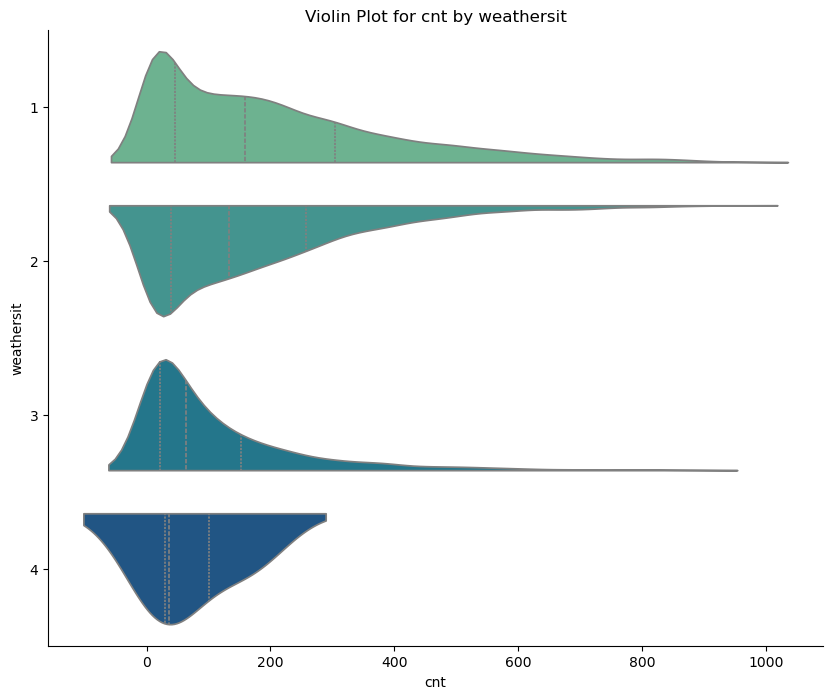

In [53]:
plot_violin(df_unclean, x_var = "cnt", y_var = "weathersit", split=True, gap = 0.1)
plt.show()

Expected: 
- As the weather gets worse, less people cycle -> less variance

## Correlation matrix post cleaning

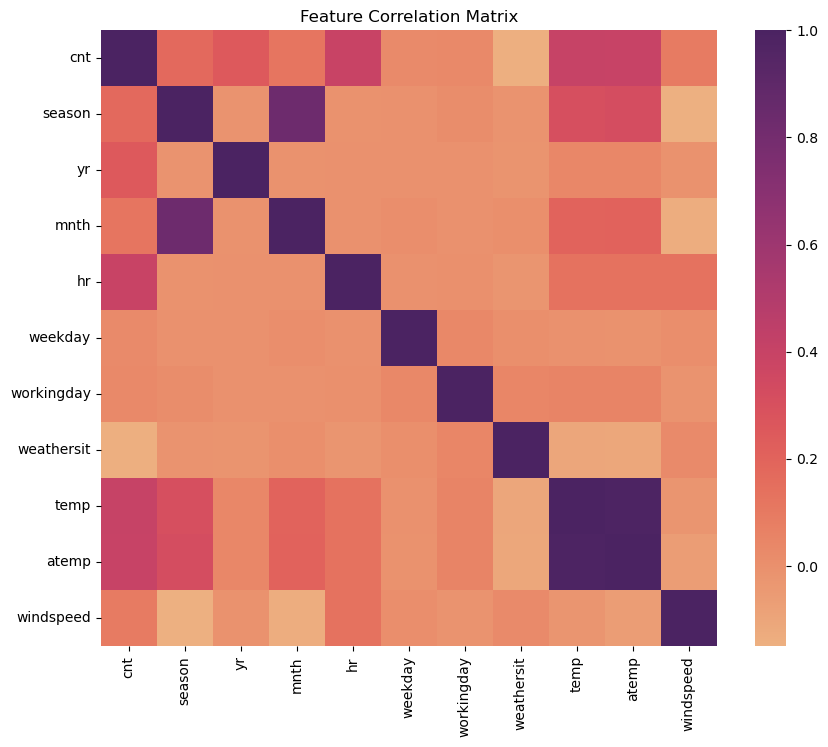

In [54]:
plot_corr(df_unclean, "instant")
plt.show()

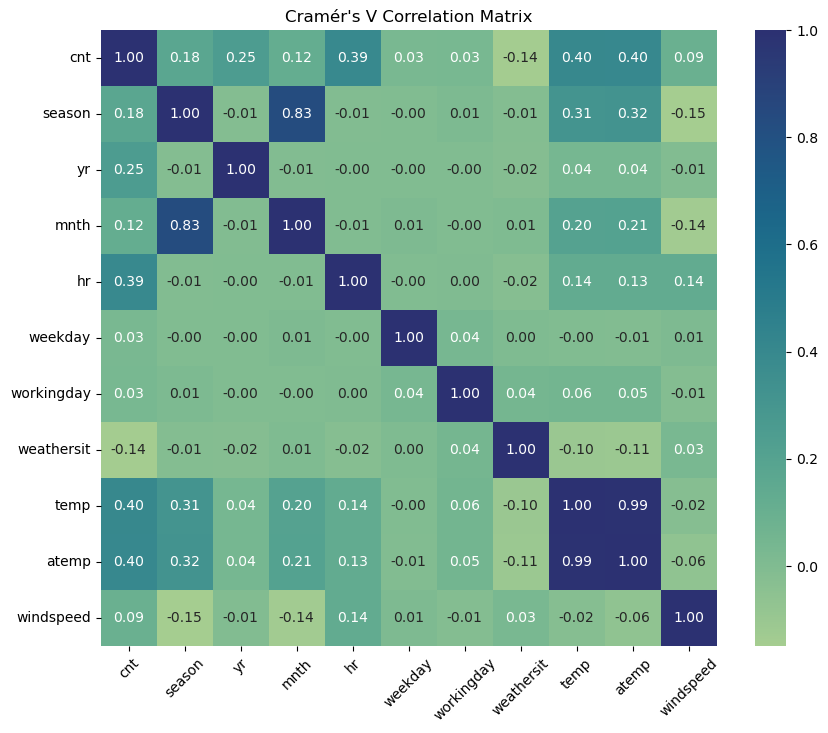

In [55]:
plot_cramerv(df_unclean, index_var = "instant")
plt.show()

- Fewer variables
- Remaining variables are more correlated with cnt, and with each other

## Saving Cleaned Dataset

In [56]:
save_parquet(df_unclean, "hours_cleaned")